In [1]:
%run MakeDataset.py

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


In [2]:
from A1.HAR.MakeDataset import X_train,X_test,y_train,y_test


print(X_train)

[[[ 1.19648    -0.1606898  -0.740178  ]
  [ 1.22203    -0.2672951  -0.7717485 ]
  [ 1.22311    -0.4338634  -0.7678422 ]
  ...
  [ 0.4974957  -0.2795907  -0.2029592 ]
  [ 0.5064167  -0.286091   -0.2564634 ]
  [ 0.5609918  -0.302237   -0.2553743 ]]

 [[ 0.253887    0.6446213   0.7305601 ]
  [ 0.2547409   0.6470096   0.7330282 ]
  [ 0.256914    0.6468081   0.7354798 ]
  ...
  [ 0.2489302   0.642803    0.7323693 ]
  [ 0.2503708   0.6447095   0.7369245 ]
  [ 0.2513104   0.6440663   0.735841  ]]

 [[ 0.9736077  -0.1844755  -0.2821974 ]
  [ 0.9760866  -0.1867793  -0.2848794 ]
  [ 0.977865   -0.191836   -0.2891687 ]
  ...
  [ 0.9779202  -0.1834941  -0.2829651 ]
  [ 0.9796224  -0.1832831  -0.279844  ]
  [ 0.9775468  -0.1833646  -0.2764387 ]]

 ...

 [[ 0.1943966   0.5317094   0.834933  ]
  [ 0.1938159   0.5319046   0.8337903 ]
  [ 0.1907567   0.5332984   0.8291312 ]
  ...
  [ 0.188955    0.5606699   0.8099954 ]
  [ 0.186853    0.5615242   0.8113412 ]
  [ 0.1877281   0.5637395   0.8163374 ]]

 [

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import tsfel

In [3]:
base_dir = 'Combined'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
headers = None

##### Getting the train data

In [4]:
X_train = []
y_train = []

for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    if os.path.isdir(category_path):
        for file_name in os.listdir(category_path):
            if file_name.endswith('.csv'):
                file_path = os.path.join(category_path, file_name)
                # subject_number = int(file_name.split('_')[1].split('.')[0])
                if headers is None:
                    headers = pd.read_csv(file_path, nrows=1).columns.tolist()
                    # headers.insert(0, 'Person')
                df = pd.read_csv(file_path)
                # df['Person'] = subject_number
                X_train.append(df.values)
                y_train.extend([category] * len(df))

X_train = np.vstack(X_train)
y_train = np.array(y_train)

##### Getting the test data

In [5]:
X_test = []
y_test = []

for category in os.listdir(test_dir):
    category_path = os.path.join(test_dir, category)
    if os.path.isdir(category_path):
        for file_name in os.listdir(category_path):
            if file_name.endswith('.csv'):
                file_path = os.path.join(category_path, file_name)
                # subject_number = int(file_name.split('_')[1].split('.')[0])
                if headers is None:
                    headers = pd.read_csv(file_path, nrows=1).columns.tolist()
                    # headers.insert(0, 'Person')
                df = pd.read_csv(file_path)
                # df['Person'] = subject_number
                X_test.append(df.values) 
                y_test.extend([category] * len(df)) 

X_test = np.vstack(X_test)
y_test = np.array(y_test) 

In [6]:
print("Headers: ", headers)
print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape) 
print("Training labels shape: ", y_train.shape)
print("Testing labels shape: ", y_test.shape)

Headers:  ['accx', 'accy', 'accz']
Training data shape:  (470528, 3)
Testing data shape:  (188608, 3)
Training labels shape:  (470528,)
Testing labels shape:  (188608,)


In [7]:
print(X_train)

[[ 0.1811413  0.7878133  0.581194 ]
 [ 0.1803886  0.78823    0.5840168]
 [ 0.1845716  0.7888803  0.5806201]
 ...
 [ 1.224313  -0.2120158 -0.6678434]
 [ 1.136817  -0.2319381 -0.6617569]
 [ 0.9867809 -0.2789102 -0.7260519]]


## Q1

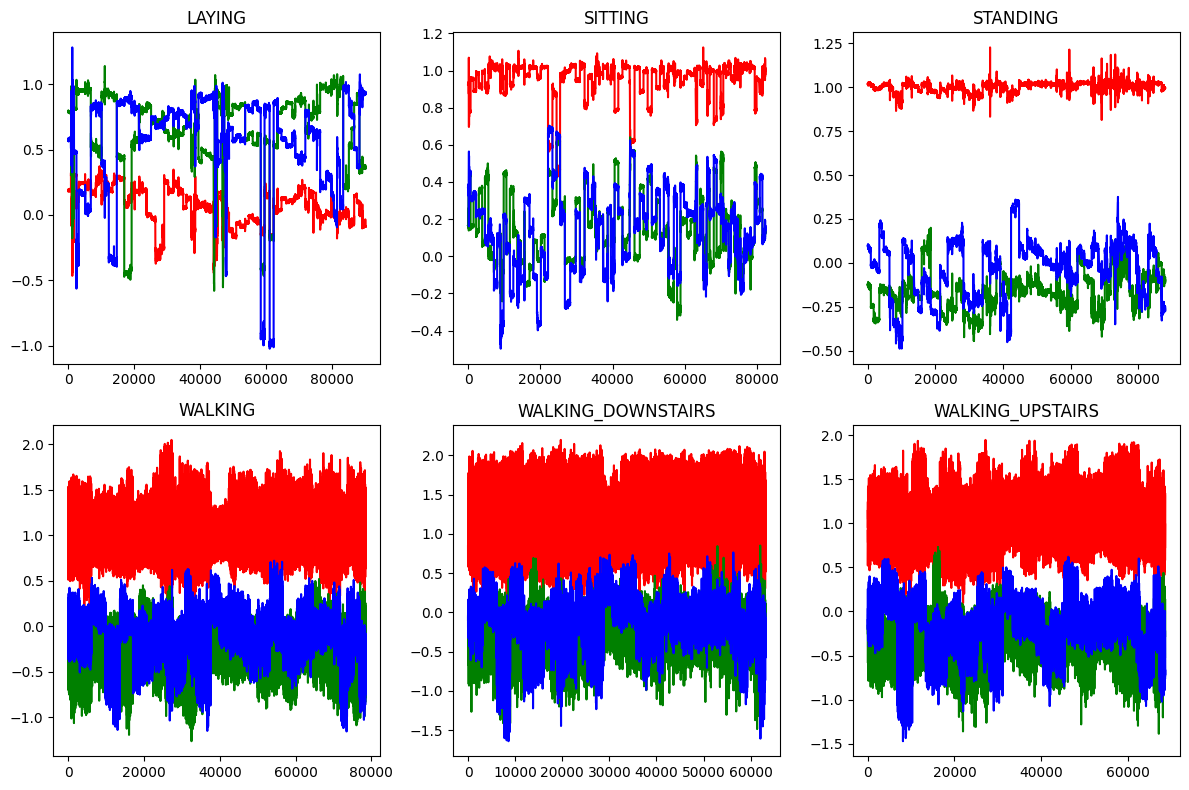

In [8]:
activity_classes = np.unique(y_train)

color_accx = 'red'
color_accy = 'green'
color_accz = 'blue'

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i in range(len(activity_classes)):
    waveform = X_train[y_train == activity_classes[i]]
    row = i // 3
    col = i % 3
    axes[row, col].plot(waveform[:, 0], label='accx', color=color_accx)
    axes[row, col].plot(waveform[:, 1], label='accy', color=color_accy)
    axes[row, col].plot(waveform[:, 2], label='accz', color=color_accz)
    axes[row, col].set_title(activity_classes[i])

plt.tight_layout()
plt.show()

In [9]:
# # Extract person_ids
# person_ids = X_train[:, -1]

# # Get unique person_ids and their count
# unique_person_ids = np.unique(person_ids)
# num_persons = len(unique_person_ids)

# # Find the maximum number of entries for any person_id
# max_entries = max(np.sum(person_ids == pid) for pid in unique_person_ids)

# # Initialize a 3D array to hold the grouped data
# # Shape: (num_persons, max_entries, 3) since we exclude the person_id column
# grouped_data = np.full((num_persons, max_entries, 3), np.nan)  # Fill with NaN for empty entries

# # Fill the 3D array
# for i, pid in enumerate(unique_person_ids):
#     # Get the entries for this person_id
#     entries = X_train[person_ids == pid, :-1]  # Exclude the person_id column
#     # Assign entries to the 3D array
#     grouped_data[i, :entries.shape[0], :] = entries

# print("Grouped 3D array shape:", grouped_data.shape)
# print(grouped_data)

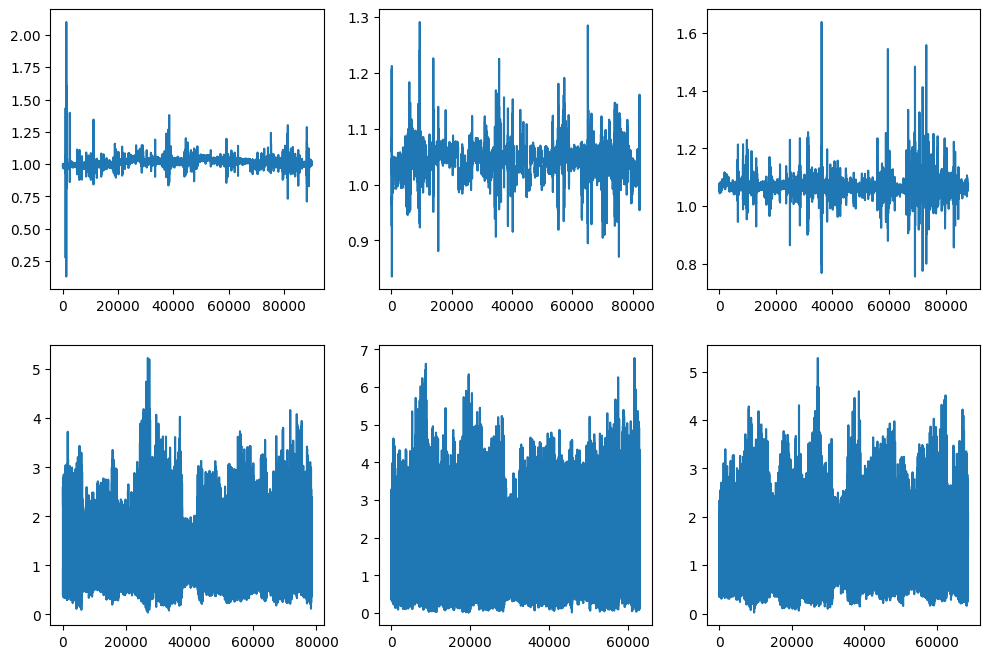

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i in range(len(activity_classes)):
    waveform = X_train[y_train == activity_classes[i]]

    sum_of_squares = np.sum(waveform**2, axis=1)

    row = i // 3
    col = i % 3
    axes[row, col].plot(sum_of_squares, label=activity_classes[i])

plt.show()

In [11]:
X_train_total_acc = np.sum(grouped_data**2, axis=2)
X_train_total_acc = X_train_total_acc.reshape(-1, 1)

data_with_labels = np.column_stack((X_train_total_acc, y_train))

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(data_with_labels)

plt.figure(figsize=(8, 6))
for activity in np.unique(y_train):
    indices = np.where(y_train == activity)
    plt.scatter(X_train_pca[indices, 0], X_train_pca[indices, 1], label=activity)
plt.title('PCA on Total Acceleration')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

NameError: name 'grouped_data' is not defined

In [12]:
cfg = tsfel.get_features_by_domain()
X = tsfel.time_series_features_extractor(cfg, X_train)

*** Feature extraction started ***


C:\Users\aashm\AppData\Local\Temp\ipykernel_28940\208847722.py:2: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, X_train)


KeyboardInterrupt: 